<a href="https://colab.research.google.com/github/drvoss/Colab-Notebooks/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensor([0.9984, 2.0263, 2.8626], requires_grad=True)

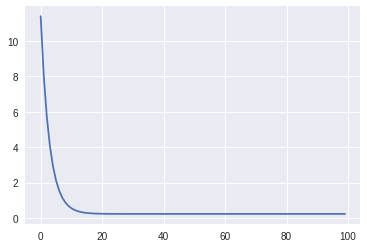

In [46]:
import numpy as np
import torch

# 참(true)의 계수
w_true = torch.Tensor([1, 2, 3])
# X 데이터 준비. 절편을 회귀 계수에 포함시키기 위해
# X의 최초 차원에 1을 추가해 둔다
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)
# 참의 계수와 각 X의 내적을 행렬과 벡터의 곱으로 모아서 계산
y = torch.mv(X, w_true) + torch.randn(100) * 0.5
# 기울기 하강으로 최적화하기 위해 파라미터 Tensor를
# 난수로 초기화해서 생성
w = torch.randn(3, requires_grad=True)
# 학습률
gamma = 0.1

# 손실 함수의 로그
losses = []
# 100회 반복
for epoc in range(100):
  # 전회의 backward 메서드로 계산된 경사값을 초기화
  w.grad = None
  # 선형 모델로 y 예측값을 계산
  y_pred = torch.mv(X, w)
  # MSE loss와 w에 의한 미분을 계산
  loss = torch.mean((y - y_pred)**2)
  loss.backward()
  # 경사를 갱신한다
  # w를 그대로 대입해서 갱신하면 다른 텐서가 돼서
  # 계산 그래프가 망가진다. 따라서 data만 갱신한다
  w.data = w.data - gamma * w.grad.data
  # 수렴 확인을 위한 loss를 기록해 둔다
  losses.append(loss.item())

%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

w